In [1]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation, ArtistAnimation
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Решение системы уравнений газовой динамики

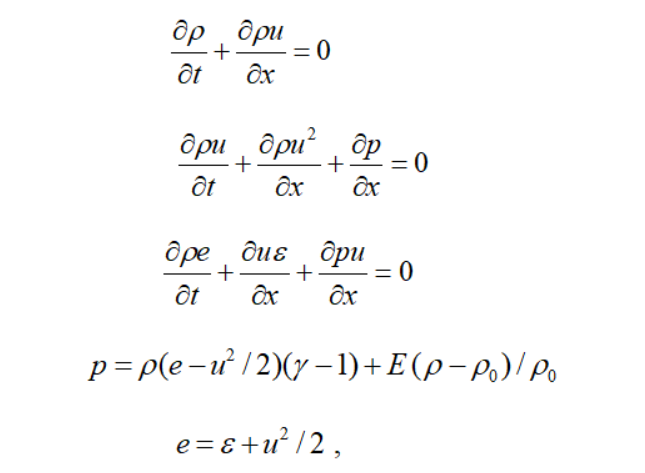

In [2]:
from scipy.optimize import fsolve

#Функции для начальных данных и точного решения

def a1(P):
    if(P <= p1):
        return (gamma - 1)/2/gamma * dens1 * c1 * (1 - (P + p0)/(p1 + p0))/(1 - ((P + p0)/(p1 + p0))**((gamma - 1)/2/gamma))
    else:
        return sqrt(dens1 * ((gamma + 1)* (P + p0) + (gamma - 1) * (p1 + p0))/2)
    
def a2(P):
    if(P <= p2):
        return (gamma - 1)/2/gamma * dens2 * c2 * (1 - (P + p0)/(p2 + p0))/(1 - ((P + p0)/(p2 + p0))**((gamma - 1)/2/gamma))
    else:
        return sqrt(dens2 * ((gamma + 1)* (P + p0) + (gamma - 1) * (p2+p0))/2)

def f(P):
    return P - (a2(P)*p1+a1(P)*p2 + a1(P)*a2(P)*(u1 - u2)) / (a1(P) + a2(P)) #P

def create_initial_data(N_x, N_t, l, T, p1, p2, u1, u2, dens1, dens2, gamma, dens0, c_0):
    en1 = (p1 - c_0**2*(dens1 - dens0))/(dens1 * (gamma - 1)) + u1**2/2 
    en2 = (p2 - c_0**2*(dens2 - dens0))/(dens2 * (gamma - 1)) + u2**2/2 
    h = 2*l/(N_x - 1); dt = T/(N_t - 1)
    x = np.arange(-l, l + h, h)
    t = np.arange(0, T + dt, dt)
    
    dens_pr = dens2 * np.ones(N_x)
    dens_pr[:N_x//2] = dens1* np.ones(N_x//2)
    pres_pr = p2 *np.ones(N_x)
    pres_pr[:N_x//2 ] = p1* np.ones(N_x//2)
    en_pr = np.ones(N_x) * en2
    en_pr[:N_x//2 ] = en1* np.ones(N_x//2)
    u_pr = np.ones(N_x) * u2
    u_pr[:N_x//2] = u1 * np.ones(N_x//2)
    
    return x, t, h, dt, en1, en2, dens_pr, pres_pr, en_pr, u_pr

def calculate_precise_data(p1, p2, u1, u2, dens1, dens2, gamma, dens0, c_0, c1, c2):
    inversion = 0
    if(p2 <= p1):
        p1, p2 = p2, p1
        dens1, dens2 = dens2, dens1
        c1, c2 = c2, c1
        u1, u2 = u2, u1
        inversion = 1
    Ush = (p2 - p1)/sqrt(dens1 * ((gamma + 1)* p2 + (gamma - 1) * p1)/2)
    Uout = 2*c2/(1 - gamma) * (1 - (p1/p2)**((gamma-1)/(2*gamma)))
    Uvac = -2*(c1 + c2)/(gamma - 1)    
    
    if(u1 - u2 < Uvac):
        print("Вправо и влево ВР, в центре вакуум")
        right = 1
        left = 1
        print("У уравнения нет вещественного корня. В области вакуума P =", -p0, "R = 0")
        P = -p0
        R = 0
        return -999
    
    elif(u1 - u2 > Ush):
        print("Вправо и влево УВ")
        P = fsolve(f, x0 = (p2 + p1)/2 )[0]
        U = (a1(P)*u1 + a2(P)*u2 + p1 - p2)/(a1(P) + a2(P))
        R1 = dens1*((gamma + 1)*(P + p0) + (gamma - 1)*(p1 + p0))/((gamma - 1)*(P + p0) + (gamma + 1)*(p1 + p0))
        R2 = dens2*((gamma + 1)*(P + p0) + (gamma - 1)*(p2 + p0))/((gamma - 1)*(P + p0) + (gamma + 1)*(p2 + p0))
        D1 = u1 - a1(P)/dens1; D2 = u2 + a2(P)/dens2
        C1 = sqrt(gamma * P / R1)
        C2 = sqrt(gamma * P / R2)
        right = 0
        left = 0
    
    elif(Uout< u1 - u2< Ush):
        print("Влево УВ, вправо ВР")
        P = fsolve(f, x0 = (p2 + p1)/2 )[0]
        U = (a1(P)*u1 + a2(P)*u2 + p1 - p2)/(a1(P) + a2(P))
        R1 = dens1*((gamma + 1)*(P + p0) + (gamma - 1)*(p1 + p0))/((gamma - 1)*(P + p0) + (gamma + 1)*(p1 + p0))
        R2 = dens2*((gamma + 1)*(P + p0) + (gamma - 1)*(p2 + p0))/((gamma - 1)*(P + p0) + (gamma + 1)*(p2 + p0))
        D1 = u1 - a1(P)/dens1; D2 = u2+a2(P)/dens2
        C1 = sqrt(gamma * P / R1)
        C2 = sqrt(gamma * P / R2)
        right = 1
        left = 0
    
    elif( Uvac < u1 - u2 < Uout):
        print("вправо и влево ВР")
        P = fsolve(f, x0 = (p2 + p1)/2 )[0]
        U = (a1(P)*u1 + a2(P)*u2 + p1 - p2)/(a1(P) + a2(P))
        R1 = dens1*((gamma + 1)*(P + p0) + (gamma - 1)*(p1 + p0))/((gamma - 1)*(P + p0) + (gamma + 1)*(p1 + p0))
        R2 = dens2*((gamma + 1)*(P + p0) + (gamma - 1)*(p2 + p0))/((gamma - 1)*(P + p0) + (gamma + 1)*(p2 + p0))
        D1 = u1 - a1(P); D2 = u2+a2(P)/dens2
        C1 = sqrt(gamma * P / R1)
        C2 = sqrt(gamma * P / R2)
        right = 1
        left = 1
    
    if(inversion == 1):
        left, right = right, left
        U = -U
        R1, R2 = R2, R1
        D1, D2 = D2, D1
        C1, C2 = C2, C1
        print("Ответ нужно инвертировать")
    
    #print("P:", P)
    #print("U:", U)
    #print("R1:", R1, "R2:", R2)
    #print("D1:", D1, "D2:", D2)    
    return P, U, R1, R2, D1, D2, left, right, C1, C2

def lsystemEq(y):
    t, x, I1, I3, u, c, p, dens = y
    return [(u - c)*t - x, c - sqrt(gamma * p/dens), u + 2 * c /(gamma - 1) - I1, p/dens**gamma - I3]

def rsystemEq(y):
    t, x, I1, I3, u, c, p, dens = y
    return [(u + c)*t - x, c - sqrt(gamma * p/dens), u - 2 * c /(gamma - 1) - I1, p/dens**gamma - I3]

def params_for_left_rarefaction_wave(x, t, left):
    
    if(left == 1):
        I1 = u1 + 2 * c1 / (gamma - 1)
        I3 = p1/dens1**gamma
        ul, cl, pl, densl = fsolve((lambda z: lsystemEq([t, x, I1, I3] + list(z))), x0 = [(u1 + U)/2, (c1 + C1)/2, (p1 + P)/2, (dens1 + R1)/2])
        return ul, cl, pl, densl
    else:
        return None 

def params_for_right_rarefaction_wave(x, t, right):    
    
    if(right == 1):
        I1 = u2 - 2 * c2 / (gamma - 1)
        I3 = p2/dens2**gamma
        ur, cr, pr, densr = fsolve((lambda z: rsystemEq([t, x, I1, I3] + list(z))), x0 = [(U + u2)/2, (C2 + c2)/2, (P + p2)/2, (R2 + dens2)/2])
        return ur, cr, pr, densr
    else:
        return None

def precise_solution_for_rw(left, right, t0):
    ul_pr = np.zeros(N_x); cl_pr = np.zeros(N_x); pl_pr = np.zeros(N_x); densl_pr = np.zeros(N_x)
    if(left == 1):
        xl = (u1 - c1) * t0
        xr = (U - C1) * t0
        for i_x in range(N_x):
            if(x[i_x] <= xl):
                ul_pr[i_x] = u1
                cl_pr[i_x] = c1
                pl_pr[i_x] = p1 
                densl_pr[i_x] = dens1
            elif(xl <= x[i_x] <= xr):
                ul, cl, pl, densl = params_for_left_rarefaction_wave(x[i_x], t0, left)
                ul_pr[i_x] = ul
                cl_pr[i_x] = cl
                pl_pr[i_x] = pl 
                densl_pr[i_x] = densl
    
    if(right == 1):
        xr = (u2 + c2) * t0
        xl = (U + C2) * t0
        for i_x in range(N_x):
            if(xl <= x[i_x] <= xr):
                ur, cr, pr, densr = params_for_right_rarefaction_wave(x[i_x], t0, right)
                ul_pr[i_x] = ur
                cl_pr[i_x] = cr 
                pl_pr[i_x] = pr
                densl_pr[i_x] = densr
            elif(xr <= x[i_x]):
                ul_pr[i_x] = u2
                cl_pr[i_x] = c2 
                pl_pr[i_x] = p2
                densl_pr[i_x] = dens2
    return ul_pr, cl_pr, pl_pr, densl_pr

In [20]:
#Точное решение 
def Exact_r_p_v(p1,p2,ro1,ro2,u1,u2,gamma,N,t_number,xleft,xright,xmiddle):
    
    #Initialization
    f=np.zeros((3,N+1,t_number))
    
    P, U, R1, R2, D1, D2, left, right, C1, C2 = calculate_precise_data(p1, p2, u1, u2, dens1, dens2, gamma, dens0, c_0, c1, c2)
    
    #Calculation
    for n in range(0, t_number):
        for i in range(0,N+1):
            x=i*h
            t=n*tau
            if(x<xmiddle+D1*t + 2):
                f[0,i,n]=dens1
                f[1,i,n]=p1
                f[2,i,n]=u1
            elif(x>xmiddle+D2*t + 2):
                f[0,i,n]=dens2
                f[1,i,n]=p2
                f[2,i,n]=u2
            else:
                f[1,i,n]=P
                f[2,i,n]=U
                if (x<xmiddle+U*t + 2):
                    f[0,i,n]=R1
                else:
                    f[0,i,n]=R2
    return f[0,:,:],f[1,:,:],f[2,:,:]


# МКЧ 

In [21]:
#0 для промежуточных переменных
l = 2; T = 1; N_x = 201; N_t = 1001

eps = np.zeros(N_x)
M_min = np.zeros(N_x)
M_pl = np.zeros(N_x)

In [22]:
#Функции для МКЧ

def pl(val, i):
    return 0.5 * (val[i] + val[i+1])
def mi(val, i):
    return 0.5 * (val[i] + val[i-1])

def ayler_step(u_pr, dens_pr, pres_pr, en_pr):
    u_cur = np.zeros(N_x)
    en_cur = np.zeros(N_x)
    u_cur[0] = u1 ; u_cur[-1] = u2
    en_cur[0] = en1; en_cur[-1] = en2    
    for i in range(1, N_x - 1):
        u_cur[i] = u_pr[i] - sigma * (pl(pres_pr, i) - mi(pres_pr, i)) / dens_pr[i] 
        en_cur[i] = en_pr[i] - sigma * (pl(pres_pr, i) * pl(u_pr, i) - mi(pres_pr, i) * mi(u_pr, i))/dens_pr[i]  
    return u_cur, en_cur 

def lagrange_step(u_pr, dens_pr):
    M_pl = np.zeros(N_x)
    M_min = np.zeros(N_x)
    for i in range(1, N_x  - 1):
        u_pl = pl(u_pr, i)
        if(u_pl >= 0):
            M_pl[i] = dt * u_pl * dens_pr[i]
        else:
            M_pl[i] = dt * u_pl * dens_pr[i + 1]
        
        u_mi = mi(u_pr, i)
        if(u_mi >= 0):
            M_min[i] =  dt * u_mi * dens_pr[i - 1]
        else:
            M_min[i] =  dt * u_mi * dens_pr[i]
        
    M_pl[0] = M_pl[1] ; M_pl[-1] = M_pl[-2]
    M_min[0] = M_min[1] ; M_min[-1] = M_min[-2]
        
    return M_pl, M_min

def final_step(M_pl, M_min, u_pr, dens_pr, pres_pr, en_pr):
    den_cur = np.zeros(N_x)
    u_cur = np.zeros(N_x)
    en_cur = np.zeros(N_x)
    
    den_cur[0] = dens1 ; den_cur[-1] = dens2
    u_cur[0] = u1 ; u_cur[-1] = u2
    en_cur[0] = en1 ; en_cur[-1] = en2   
    
    for i in range(1, N_x - 1):
        u_pl = pl(u_pr, i)
        D_pl = 0
        if(u_pl < 0):
            D_pl = 1
        Y_pl = abs(M_pl[i])
        
        u_mi = mi(u_pr, i)
        D_mi = 0
        if(u_mi >= 0):
            D_mi = 1
        Y_mi = abs(M_min[i])
        
        den_cur[i] = dens_pr[i] + 2 * ((D_mi - 0.5) * Y_mi + (D_pl - 0.5) * Y_pl) / dx
        u_cur[i] = (u_pr[i] * ( dens_pr[i] * dx - (1 - D_mi) * Y_mi - (1 - D_pl) * Y_pl)
                    + u_pr[i-1] * D_mi * Y_mi + u_pr[i+1] * D_pl * Y_pl)/(den_cur[i] * dx)
        en_cur[i] = (en_pr[i] * ( dens_pr[i] * dx - (1 - D_mi) * Y_mi - (1 - D_pl) * Y_pl) + 
                     en_pr[i-1] * D_mi * Y_mi + en_pr[i+1] * D_pl * Y_pl)/(den_cur[i] * dx)
                
    return den_cur, u_cur, en_cur

# Лакс-Вендрофф

In [23]:
def LV(f_pr, F_pr, left_bord, righ_bord):
    q = 0.1
    f_cur = np.array([np.zeros(N_x),np.zeros(N_x),np.zeros(N_x)])
    f_int1 =  np.array([np.zeros(N_x),np.zeros(N_x),np.zeros(N_x)])
    f_int2 =  np.array([np.zeros(N_x),np.zeros(N_x),np.zeros(N_x)])
    f_smooth =  np.array([np.zeros(N_x),np.zeros(N_x),np.zeros(N_x)])
    
    f_int1[:, 0] = left_bord; f_int1[:, -1] = left_bord
    f_int2[:, 0] = righ_bord; f_int2[:, -1] = righ_bord    
    
    for i_x in range(1, N_x - 1):
        f_int1[:, i_x] = 0.5 * (f_pr[:, i_x] + f_pr[:, i_x + 1]) - 0.5 * sigma * (F_pr[:, i_x + 1] - F_pr[:, i_x])
        f_int2[:, i_x] = 0.5 * (f_pr[:, i_x] + f_pr[:, i_x - 1]) - 0.5 * sigma * (F_pr[:, i_x] - F_pr[:, i_x - 1])

    F_int1 = np.array([np.zeros(N_x),np.zeros(N_x),np.zeros(N_x)])
    F_int2 = np.array([np.zeros(N_x),np.zeros(N_x),np.zeros(N_x)])
    
    pres_int = np.zeros(N_x)
    u_int = np.zeros(N_x)
    en_int = np.zeros(N_x)
    dens_int = np.zeros(N_x)
    
    u_int = f_int1[1, :]/f_int1[0, :]
    en_int = f_int1[2, :]/f_int1[0, :]
    dens_int = f_int1[0, :]
    pres_int = dens_int * (en_int - u_int * u_int / 2) * (gamma - 1) + (c_0)**2 * (dens_int - dens0 * np.ones(N_x))
    
    F_int1[0, :] = f_int1[1, :].copy()
    F_int1[1, :] = pres_int + dens_int * u_int * u_int 
#     F_int1[2, :] = (pres_int + en_int - u_int * u_int/2) * u_int
    F_int1[2, :] = (pres_int + en_int * dens_int) * u_int
    
    u_int = f_int2[1, :]/f_int2[0, :]
    en_int = f_int2[2, :]/f_int2[0, :]
    dens_int = f_int2[0, :]
    pres_int = dens_int * (en_int - u_int * u_int / 2) * (gamma - 1) + (c_0)**2 * (dens_int - dens0 * np.ones(N_x))
    
    F_int2[0, :] = f_int2[1, :].copy()
    F_int2[1, :] = pres_int + dens_int * u_int * u_int 
#     F_int2[2, :] = (pres_int + en_int - u_int * u_int/2) * u_int
    F_int2[2, :] = (pres_int + en_int * dens_int) * u_int
    
    f_cur = f_pr - sigma * (F_int1 - F_int2)
    
    #smoоthing
    f_smooth[:, 0] = f_smooth[:, 1] = left_bord
    f_smooth[:, -1] = f_smooth[:, -2] = righ_bord
    
    for i in range(2, N_x - 2):
        D_mm = f_cur[:, i - 1] - f_cur[:, i - 2]
        D_m = f_cur[:, i] - f_cur[:, i - 1]
        D_p = f_cur[:, i+1] - f_cur[:, i]
        D_pp = f_cur[:, i + 2] - f_cur[:, i + 1]
        if ((D_pp[0]* D_p[0]) <= 0) or ((D_p[0]*D_m[0]) <= 0):
            Q_plus = D_p
        else:
            Q_plus = np.zeros(3) 
        if ((D_p[0]* D_m[0]) <= 0) or ((D_m[0]* D_mm[0]) <= 0):
            Q_minus = D_m
        else:
            Q_minus = np.zeros(3) 
        f_smooth[:, i] = f_cur[:, i] + q * (Q_plus - Q_minus) 

    return f_smooth

In [24]:
#Считаем всё

#Общие начальные
l = 2; T = 1; N_x = 201; N_t = 1001
gamma = 1.4; p1 = 10; p2 = 1; u2 = 3; u1 = 1
dens1 = 10; dens2 = 1; c_0 = 0; dens0 = 1/3
p0 = dens0 * c_0**2/gamma
c1 = sqrt(gamma * p1/dens1); c2 = sqrt(gamma * p2/dens2)



xleft = -l
xright = l
xmiddle = 0

h = 2*l/(N_x - 1)
tau = T/(N_t - 1)

p1, p2 = p2, p1
u2, u1 = u1, u2
dens1, dens2 = dens2, dens1
c1, c2 = c2, c1

#Точное решение
x, t, h, dt, en1, en2, dens_pr, pres_pr, en_pr, u_pr = create_initial_data(N_x, N_t, l, T, p1, p2, u1, u2, dens1, dens2, gamma, dens0, c_0)
dx = h
sigma = dt/h

P, U, R1, R2, D1, D2, left, right, C1, C2 = calculate_precise_data(p1, p2, u1, u2, dens1, dens2, gamma, dens0, c_0, c1, c2)

r_Exact,p_Exact,v_Exact=Exact_r_p_v(p1,p2,dens1,dens2,u1,u2,gamma,N_x ,N_t,xleft,xright,xmiddle)


#Начальные для ЛВ
dens_pr_lv, pres_pr_lv, en_pr_lv, u_pr_lv = dens_pr.copy(), pres_pr.copy(), en_pr.copy(), u_pr.copy()
f_pr = np.array([np.zeros(N_x),np.zeros(N_x),np.zeros(N_x)])
f_pr[0, :] = dens_pr_lv.copy()
f_pr[1, :] = dens_pr_lv * u_pr_lv
f_pr[2, :] = dens_pr_lv * en_pr_lv

left_bord = f_pr[:, 0]
righ_bord = f_pr[:, -1]
F_pr = np.array([np.zeros(N_x),np.zeros(N_x),np.zeros(N_x)])
F_pr[0, :] = f_pr[1, :].copy()
F_pr[1, :] = pres_pr_lv + dens_pr_lv * u_pr_lv * u_pr_lv 
F_pr[2, :] = (pres_pr_lv + en_pr_lv * dens_pr_lv) * u_pr_lv

Влево УВ, вправо ВР
Влево УВ, вправо ВР


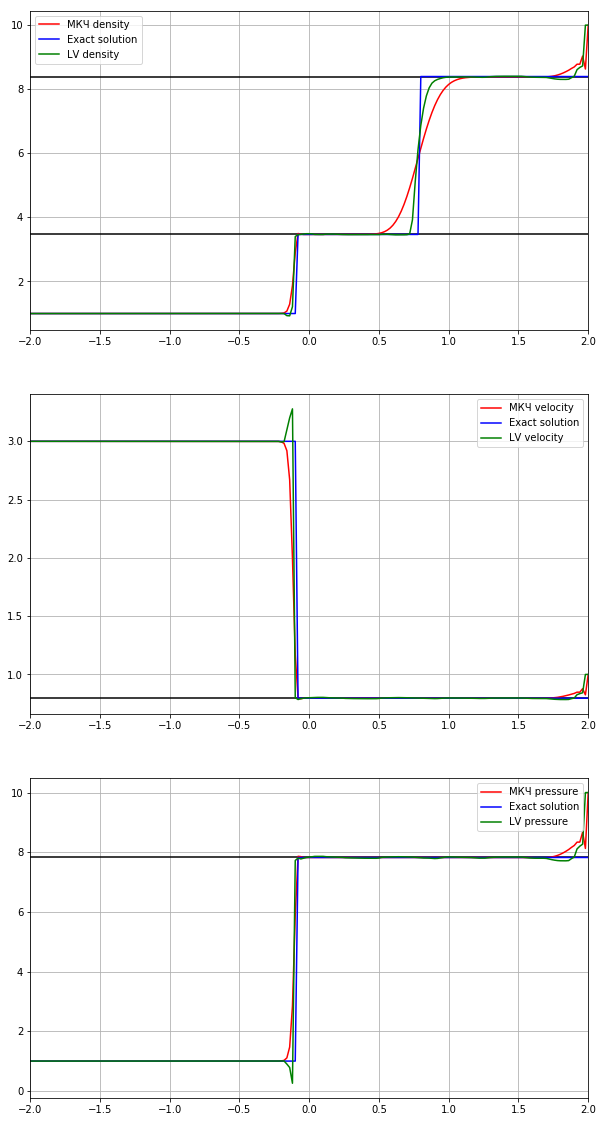

In [25]:
fig, [ax1, ax2, ax4] = plt.subplots(nrows = 3, ncols = 1)
fig.set_size_inches((10, 20))

ax4.hlines(P, -l, l)
ax2.hlines(U, -l, l)
ax1.hlines(R1, -l, l)
ax1.hlines(R2, -l, l)

ax1.set_xlim(-l, l); ax1.set_ylim(0, max(1.2 * R1, 1.2*R2, 1.2*max(dens_pr))); y1 = [0, max(1.2 * R1, 1.2*R2, 1.2*max(dens_pr))]
ax2.set_xlim(-l, l); ax2.set_ylim(0, max(1.2 * U, max(u_pr))); y2 = [min(1.2 * U,  1.2 * min(u_pr)), max(1.2 * U, 1.2 * max(u_pr))]
ax4.set_xlim(-l, l); ax4.set_ylim(0, max(1.2 * P, max(pres_pr))); y4 =[0, max(1.2 * P, 1.2 * max(pres_pr))]
img = []
for nt in range(N_t):
    u_pr, en_pr = ayler_step(u_pr, dens_pr, pres_pr, en_pr)
    M_pl, M_min = lagrange_step(u_pr, dens_pr)
    dens_pr, u_pr, en_pr = final_step(M_pl, M_min, u_pr, dens_pr, pres_pr, en_pr)
    eps = en_pr - u_pr*u_pr/2
    pres_pr = (gamma - 1) * eps * dens_pr + c_0**2 *(dens_pr - dens0 * np.ones(N_x))
    
    f_pr = LV(f_pr, F_pr, left_bord, righ_bord)
    u_pr_lv = f_pr[1, :]/f_pr[0, :]
    en_pr_lv = f_pr[2, :]/f_pr[0, :]
    dens_pr_lv = f_pr[0, :]
    pres_pr_lv = dens_pr_lv * (en_pr_lv - u_pr_lv * u_pr_lv / 2) * (gamma - 1) + c_0**2 * (dens_pr_lv - dens0 * np.ones(N_x))
    
    F_pr[0, :] = f_pr[1, :].copy()
    F_pr[1, :] = pres_pr_lv + dens_pr_lv * u_pr_lv * u_pr_lv 
    F_pr[2, :] = (pres_pr_lv + en_pr_lv * dens_pr_lv) * u_pr_lv
    
    if(left + right > 0):
        ul_pr, cl_pr, pl_pr, densl_pr  = precise_solution_for_rw(left, right, t[nt])
    
    if (nt%5 == 0): #r_Exact,p_Exact,v_Exact
        ln1,  = ax1.plot(x, dens_pr, color = 'r', linestyle = '-', label = "МКЧ density")
        ln10,  = ax1.plot(x, r_Exact[:N_x, nt], color = 'b', linestyle = '-', label = "Exact solution")
        #ln11, =  ax1.plot([nt*dt*D1]*2, y1, color = 'b', linestyle = "dashed")
        #ln12, =  ax1.plot([nt*dt*D2]*2, y1, color = 'b', linestyle = "dashed")
        #ln13, =  ax1.plot(x, densl_pr, color = 'b', linestyle = 'dotted')
        #ln14, =  ax1.plot([nt*dt*U]*2, y1, color = 'b', linestyle = "dashed")
        ln15,  = ax1.plot(x, dens_pr_lv, color = 'g', linestyle = '-', label = "LV density")
        
        
        ln2,  = ax2.plot(x, u_pr, color = 'r', linestyle = '-', label = "МКЧ velocity")
        ln20,  = ax2.plot(x, v_Exact[:N_x, nt], color = 'b', linestyle = '-', label = "Exact solution")
        #ln21, =  ax2.plot([nt*dt*D1]*2, y2, color = 'b', linestyle = "dashed")
        #ln22, =  ax2.plot([nt*dt*D2]*2, y2, color = 'b', linestyle = "dashed")
        #ln23, =  ax2.plot(x, ul_pr, color = 'b', linestyle = "dashed")
        #ln24, =  ax2.plot([nt*dt*U]*2, y2, color = 'b', linestyle = "dashed")
        ln25,  = ax2.plot(x, u_pr_lv, color = 'g', linestyle = '-', label = "LV velocity")

        ln4,  = ax4.plot(x, pres_pr, color = 'r', linestyle = '-', label = "МКЧ pressure")
        ln40,  = ax4.plot(x, p_Exact[:N_x, nt], color = 'b', linestyle = '-', label = "Exact solution")
        #ln41, =  ax4.plot([nt*dt*D1]*2, y4, color = 'b', linestyle = '-')
        #ln42, =  ax4.plot([nt*dt*D2]*2, y4, color = 'b', linestyle = '-')
        #ln43, = ax4.plot(x, pl_pr, color = 'b', linestyle = "dashed")
        #ln44, =  ax4.plot([nt*dt*U]*2, y4, color = 'b', linestyle = '-')
        ln45,  = ax4.plot(x, pres_pr_lv, color = 'g', linestyle = '-', label = "LV pressure")
        
        if(nt == 0 ):
            ax1.legend(); ax2.legend(); ax4.legend()
        #img.append([ln1, ln11, ln12, ln13, ln14, ln15, ln2, ln21, ln22, ln23, ln24, ln25, ln4, ln41, ln42, ln43, ln44, ln45])
        img.append([ln1, ln10, ln15, ln2, ln20, ln25, ln4, ln40, ln45])
        if(nt == N_t - 1):
            plt.close()
            fig1, [ax11, ax21, ax41] = plt.subplots(nrows = 3, ncols = 1)
            fig1.set_size_inches((10, 20))

            ax41.hlines(P, -l, l)
            ax21.hlines(U, -l, l)
            ax11.hlines(R1, -l, l)
            ax11.hlines(R2, -l, l)

            ax11.set_xlim(-l, l); ax1.set_ylim(0, max(1.2 * R1, 1.2*R2, 1.2*max(dens_pr))); y1 = [0, max(1.2 * R1, 1.2*R2, 1.2*max(dens_pr))]
            ax21.set_xlim(-l, l); ax2.set_ylim(0, max(1.2 * U, max(u_pr))); y2 = [min(1.2 * U,  1.2 * min(u_pr)), max(1.2 * U, 1.2 * max(u_pr))]
            ax41.set_xlim(-l, l); ax4.set_ylim(0, max(1.2 * P, max(pres_pr))); y4 =[0, max(1.2 * P, 1.2 * max(pres_pr))]
            
            #r_Exact,p_Exact,v_Exact
            
            ax11.plot(x, dens_pr, color = 'r', linestyle = '-', label = "МКЧ density")
            ax11.plot(x, r_Exact[:N_x, nt], color = 'b', linestyle = '-', label = "Exact solution")
            #ax11.plot([nt*dt*D1]*2, y1, color = 'b', linestyle = "dashed")
            #ax11.plot([nt*dt*D2]*2, y1, color = 'b', linestyle = "dashed")
            #ax11.plot(x, densl_pr, color = 'b', linestyle = 'dotted')
            #ax11.plot([nt*dt*U]*2, y1, color = 'y', linestyle = "dashed", label = "КП")
            ax11.plot(x, dens_pr_lv, color = 'g', linestyle = '-', label = "LV density")


            ax21.plot(x, u_pr, color = 'r', linestyle = '-', label = "МКЧ velocity")
            ax21.plot(x, v_Exact[:N_x, nt], color = 'b', linestyle = '-', label = "Exact solution")
            #ax21.plot([nt*dt*D1]*2, y2, color = 'b', linestyle = "dashed")
            #ax21.plot([nt*dt*D2]*2, y2, color = 'b', linestyle = "dashed")
            #ax21.plot(x, ul_pr, color = 'b', linestyle = "dashed")
            #ax21.plot([nt*dt*U]*2, y2, color = 'y', linestyle = "dashed", label = "КП")
            ax21.plot(x, u_pr_lv, color = 'g', linestyle = '-', label = "LV velocity")
            
            ax41.plot(x, pres_pr, color = 'r', linestyle = '-', label = "МКЧ pressure")
            ax41.plot(x, p_Exact[:N_x, nt], color = 'b', linestyle = '-', label = "Exact solution")
            #ax41.plot([nt*dt*D1]*2, y4, color = 'b', linestyle = "dashed")
            #ax41.plot([nt*dt*D2]*2, y4, color = 'b', linestyle = "dashed")
            #ax41.plot(x, pl_pr, color = 'b', linestyle = "dashed")
            #ax41.plot([nt*dt*U]*2, y4, color = 'y', linestyle = 'dashed', label = "КП")
            ax41.plot(x, pres_pr_lv, color = 'g', linestyle = '-', label = "LV pressure")
            
            ax11.legend(); ax21.legend(); ax41.legend()
            ax11.grid(); ax21.grid(); ax41.grid()
            

anim = ArtistAnimation(fig, img, interval = 30, blit = True)
# plt.close()

In [26]:
anim.save("animation_task4.mp4")

In [27]:
HTML(anim.to_html5_video())